In [1]:
# this notebook is used to create the building model area
# Author: Younes IBNE-ETTALEB
# we will create a Character recognition model to recognize the Tifinagh characters from the dataset
# we will use the Keras library to create the model
# we will use the Tensorflow library to train the model
# we will use the OpenCV library to preprocess the images
# we will use the Numpy library to manipulate the images
# we will use the Matplotlib library to plot the images
# we will use the Pandas library to manipulate the data

# import the libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
import os
import glob

In [2]:
# first we will read the dataset with labels
dataset_dir = r"dataset"
# the firsl folder is "AMHCD_64", it contains folders of images with labels
# let's read the images and labels (the labels are the names of the folders)
images_dir = os.path.join(dataset_dir, "AMHCD_64")
images = []
labels = []
for folder in os.listdir(images_dir):
    print("reading images from folder: ", folder)
    for file in os.listdir(os.path.join(images_dir, folder)):
        image = cv2.imread(os.path.join(images_dir, folder, file))
        images.append(image)
        labels.append(folder)

#show the number of images and labels
print("number of images: ", len(images))
print("number of labels: ", len(labels))


reading images from folder:  ya
reading images from folder:  yab
reading images from folder:  yach
reading images from folder:  yad
reading images from folder:  yadd
reading images from folder:  yae
reading images from folder:  yaf
reading images from folder:  yag
reading images from folder:  yagh
reading images from folder:  yagw
reading images from folder:  yah
reading images from folder:  yahh
reading images from folder:  yaj
reading images from folder:  yak
reading images from folder:  yakw
reading images from folder:  yal
reading images from folder:  yam
reading images from folder:  yan
reading images from folder:  yaq
reading images from folder:  yar
reading images from folder:  yarr
reading images from folder:  yas
reading images from folder:  yass
reading images from folder:  yat
reading images from folder:  yatt
reading images from folder:  yaw
reading images from folder:  yax
reading images from folder:  yay
reading images from folder:  yaz
reading images from folder:  yazz
r

In [3]:
# convert the images to grayscale
images = [cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in images]

# resize the images to 64x64
images = [cv2.resize(image, (64, 64)) for image in images]

# convert the images to numpy arrays
images = np.array(images)

# our labels are categorical, we need to convert them to numerical values
# we will use the LabelEncoder class from the sklearn library
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=0)

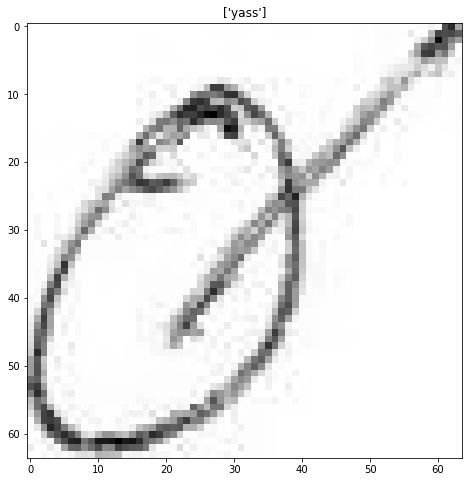

In [7]:
# show the first image in the training set with its label
plt.figure(figsize=(8, 8))
plt.imshow(X_test[0], cmap="gray")
plt.title(label_encoder.inverse_transform([y_test[0]]))
plt.show()

In [12]:
# create the model using the Sequential class from the Keras library
#####################################################################
# the model architecture is:
#conv_1 (Conv 2D) (None, 26, 26, 32) 320
#conv_2 (Conv 2D) (None, 26, 26, 64) 18,496
#max_pooling2D_18 (MaxPooling2D) (None, 13, 13, 64) 0
#conv_3 (Conv 2D) (None, 13, 13, 128) 73,856
#max_pooling2D_19 (MaxPooling2D) (None, 6, 6, 128) 0
#conv_4 (Conv 2D) (None, 6, 6, 256) 295,168
#max_pooling2D_20 (MaxPooling2D) (None, 3, 3, 256) 0
#flatten (Flatten) (None, 2304) 0
#FC_1 (Dense) (None, 64) 147,520
#FC_2 (Dense) (None, 10) 650
#####################################################################

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(64, 64, 1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dense(33, activation="softmax"))

# show the model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 62, 62, 32)        320       
                                                                 
 conv2d_13 (Conv2D)          (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 14, 14, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 12, 12, 256)      

In [ ]:
# now we will compile the model
import tensorflow as tf
model.compile(optimizer=tf.keras.optimizers.Adam( learning_rate=0.001), loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    
# train the model
model.fit(X_train, 
        y_train, 
        epochs=10, 
        validation_data=(X_test, y_test),
        batch_size=64,)

In [14]:
# we will test the model on the test set
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

print("accuracy: ", np.sum(y_pred == y_test) / len(y_test))

161/161 [==============================] - 11s 66ms/step
accuracy:  0.027972027972027972


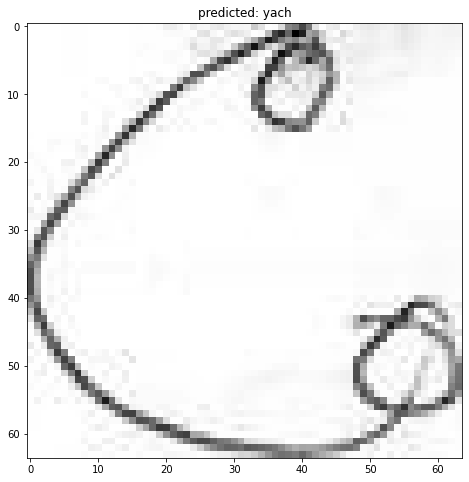

In [30]:
# test it on the first image in the test set and show the result with ploting the image
plt.figure(figsize=(8, 8))
plt.imshow(X_test[0], cmap="gray")
plt.title("predicted: " + label_encoder.inverse_transform([y_pred[0]])[0])
plt.show()


# Loading model :

In [12]:
tif_model = keras.models.load_model('model_tifinagh.h5')

In [20]:
labels = []
dataset_dir = r"dataset"
# the firsl folder is "AMHCD_64", it contains folders of images with labels
# let's read the images and labels (the labels are the names of the folders)
images_dir = os.path.join(dataset_dir, "AMHCD_64")

for folder in os.listdir(images_dir):
    labels.append(folder)

1/1 [==============================] - 0s 60ms/step


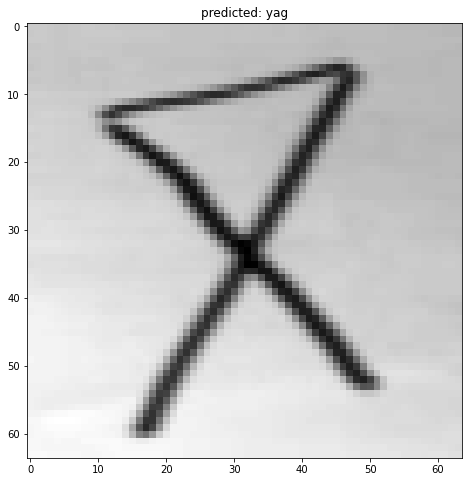

In [19]:
# reading the test image
image = cv2.imread(r"C:\Users\Asus\Desktop\Ultimate Projects\Tfinagh Recognetion model\Tifinagh-Recognition-Model\test_model1.png")

# convert the images to grayscale
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

# move the gaussian noises
image = cv2.GaussianBlur(image, (5, 5), 0)


# resize the images to 64x64
image = cv2.resize(image, (64, 64)) 

# convert the images to numpy arrays
image = np.array(image)

# reshape the image to be 4D
image = image.reshape(-1, 64, 64, 1)

# predict the image
y_pred = tif_model.predict(image)
y_pred = np.argmax(y_pred, axis=1)

# define labelencoder object to inverse the labels to their original values
# import LabelEncoder() from sklearn library
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# fit the label encoder to the labels
label_encoder.fit_transform(labels)

# show the predicted label with the image ( change the dimension of the image to 64x64 )
plt.figure(figsize=(8, 8))
plt.imshow(image.reshape(64, 64), cmap="gray")
plt.title("predicted: " + label_encoder.inverse_transform(y_pred)[0])
plt.show()